## Python Project For Data Analysis

In [31]:
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [32]:
data = pd.read_csv("Customer Churn (2).csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
hmt = data.rename(columns={"customerID":"ID"},inplace = True)

In [34]:
data.shape

(7043, 21)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
data['TotalCharges'] = data['TotalCharges'].replace(" ","0")
data['TotalCharges'] = data['TotalCharges'].astype("float")

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
data.isnull().sum()

ID                  0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
data.isnull().sum().sum()

0

In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
data.duplicated().sum()

0

### Exploratory Data Analysis (EDA)

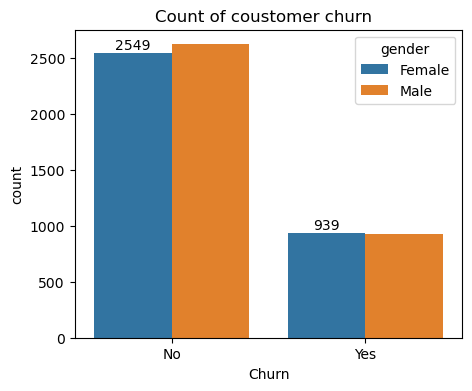

In [12]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x='Churn' ,data = data,hue = 'gender' )
plt.title("Count of coustomer churn  ")
ax.bar_label(ax.containers[0])
plt.show()

In [13]:
gb = data.groupby('Churn').agg({'Churn':"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


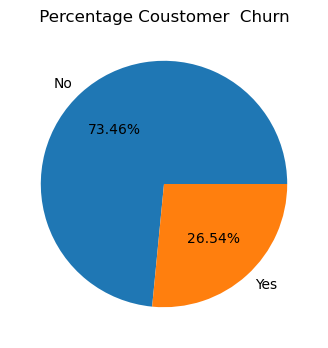

In [14]:
plt.figure(figsize=(5,4))
# plt.pie(gb, labels = gb.index, autopct='%1.2f%%')
plt.pie(gb['Churn'], labels = gb.index, autopct='%1.2f%%')
plt.title(" Percentage Coustomer  Churn ")
plt.show()

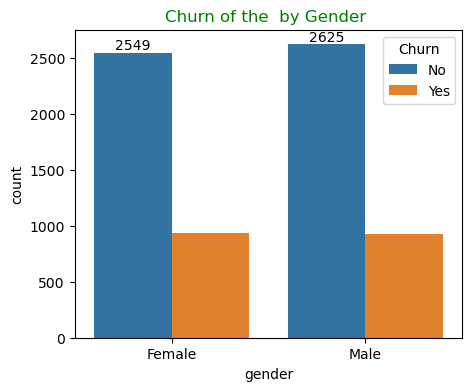

In [15]:
plt.figure(figsize=(5,4))
bx = sns.countplot(x='gender',data = data ,hue="Churn")
plt.title("Churn of the  by Gender ",color ="g")
bx.bar_label(bx.containers[0])
plt.show()

In [16]:
gb = data.groupby('PaymentMethod').agg({'PaymentMethod':"count"})
gb

,PaymentMethod
PaymentMethod,
Bank transfer (automatic),1544
Credit card (automatic),1522
Electronic check,2365
Mailed check,1612


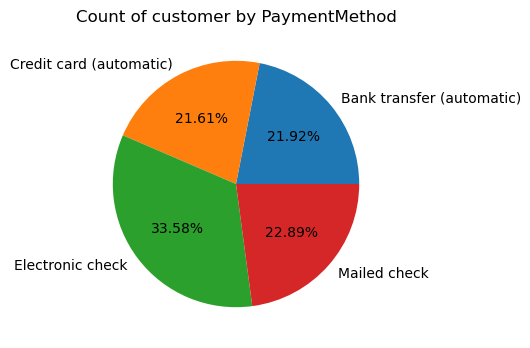

In [17]:

plt.figure(figsize=(5,4))
plt.pie(gb['PaymentMethod'],labels = gb.index,autopct="%1.2f%%")
plt.title("Count of customer by PaymentMethod" )
plt.show()

In [18]:
box = data.groupby('PhoneService').agg({'PhoneService':"count"})
box

,PhoneService
PhoneService,
No,682
Yes,6361


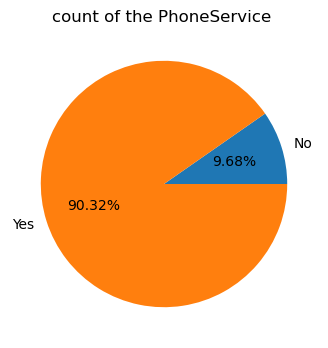

In [19]:
plt.figure(figsize=(5,4))
plt.pie(box['PhoneService'],labels = box.index ,autopct="%1.2f%%")
plt.title("count of the PhoneService ")
plt.show()

In [20]:
box = data.groupby('TechSupport').agg({'TechSupport':"count"})
box

,TechSupport
TechSupport,
No,3473
No internet service,1526
Yes,2044


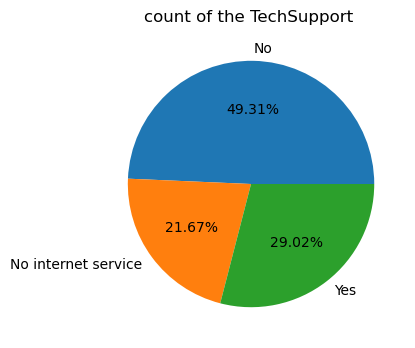

In [21]:
plt.figure(figsize=(5,4))
plt.pie(box['TechSupport'],labels = box.index, autopct="%1.2f%%")
plt.title("count of the TechSupport ")
plt.show()

In [22]:
hmt = data['PhoneService'].value_counts()
hmt

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

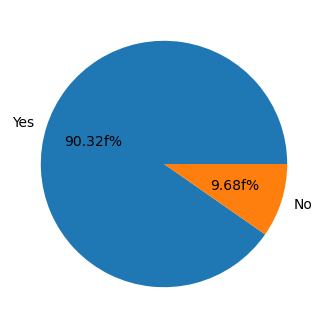

In [23]:
plt.figure(figsize=(5,4))
plt.pie(hmt,labels = hmt.index,autopct="%1.2ff%%")
plt.show()

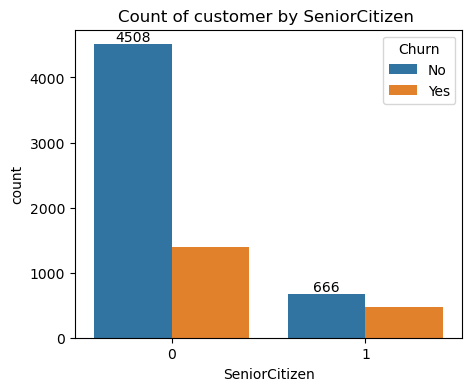

In [24]:
plt.figure(figsize=(5,4))
bx = sns.countplot(x="SeniorCitizen",data = data,hue="Churn" )
plt.title("Count of customer by SeniorCitizen " )
bx.bar_label(bx.containers[0])
plt.show()

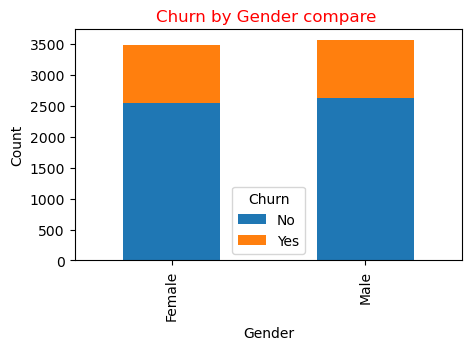

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data structure
# data = pd.DataFrame({'gender': [...], 'Churn': [...]})

# Create a pivot table to count churn by gender
pivot_table = data.pivot_table(index='gender', columns='Churn', aggfunc='size', fill_value=0)

# Plot the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(5, 3))

plt.title("Churn by Gender compare ", color="r")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Churn')
plt.show()


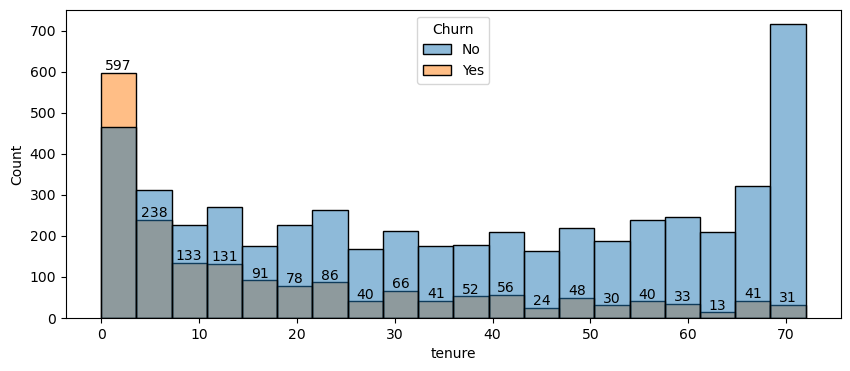

In [26]:
plt.figure(figsize=(10,4))
df = sns.histplot(x='tenure',data = data,bins=20,hue="Churn")
df.bar_label(df.containers[0])
plt.show()


In [27]:
# df = data.groupby(['tenure'],as_index = False )['Churn'].sum().sort_values(by ='Churn', ascending = False).head(10)
# sns.set(rc={'figure.figsize':(20,5)})
# sns.barplot(data = df ,x = 'tenure')

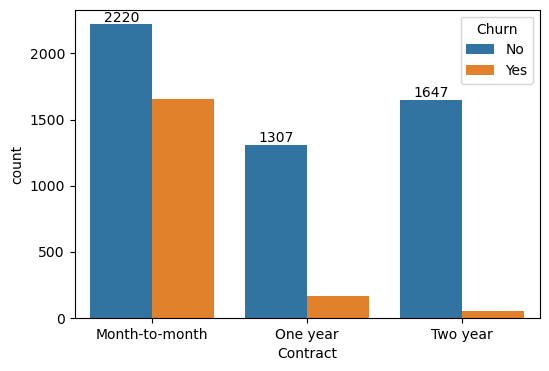

In [28]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Contract',data = data ,hue="Churn")
ax.bar_label(ax.containers[0])
plt.show()

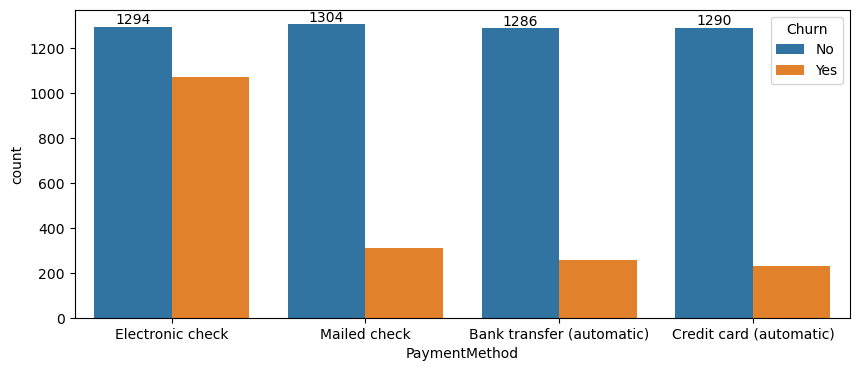

In [29]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x='PaymentMethod',data = data ,hue="Churn")
ax.bar_label(ax.containers[0])
plt.show()

In [30]:
data.columns.values

array(['ID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)